# 포트폴리오 수익률

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
from pykrx import stock
from pykrx import bond
import warnings
warnings.filterwarnings('ignore')


In [2]:
코스피분기재무제표 = pd.read_csv('./fnspace_v5.csv')
전체종목코스피시가총액 = pd.read_csv('./전체종목코스피시가총액.csv')

In [3]:
코스피분기재무제표

,날짜,종목코드,종목명,시장타입,account_id,재무요소,값
0,200012,5930,삼성전자,K,1300,당좌자산(계),9.955097e+12
1,200012,5930,삼성전자,K,1400,재고자산(계),4.724876e+12
2,200012,5930,삼성전자,K,2000,유동자산(계),1.467997e+13
3,200012,5930,삼성전자,K,4000,비유동자산(계),3.174153e+13
4,200012,5930,삼성전자,K,5000,자산총계,4.642150e+13
...,...,...,...,...,...,...,...
998755,201912,7660,이수페타시스,K,75684,총자산회전율,2.596025e-01
998756,202006,7660,이수페타시스,B,75684,총자산회전율,2.779672e-01
998757,202012,7660,이수페타시스,K,75684,총자산회전율,-8.546766e-03
998758,202106,7660,이수페타시스,B,75684,총자산회전율,2.185756e-01


# 종목코스 0채우기

In [4]:
코스피분기재무제표['종목코드'] = 코스피분기재무제표['종목코드'].astype(str)

In [5]:
코스피분기재무제표['종목코드'] = 코스피분기재무제표['종목코드'].str.zfill(6)

In [6]:
코스피분기재무제표['날짜'] = 코스피분기재무제표['날짜'].astype('str')

In [42]:
# 코스피재무제표['날짜'] = 코스피재무제표['날짜'].str.extract(r'(\d\d\d\d\d\d)')   #일 제거 연,월까지만

In [7]:
# 코스피재무제표 = 코스피재무제표[코스피재무제표['날짜'].str.contains(r'(\d\d\d\d12)')==True]
코스피분기재무제표    # 날짜 12월달 만 남기를바라며

,날짜,종목코드,종목명,시장타입,account_id,재무요소,값
0,200012,005930,삼성전자,K,1300,당좌자산(계),9.955097e+12
1,200012,005930,삼성전자,K,1400,재고자산(계),4.724876e+12
2,200012,005930,삼성전자,K,2000,유동자산(계),1.467997e+13
3,200012,005930,삼성전자,K,4000,비유동자산(계),3.174153e+13
4,200012,005930,삼성전자,K,5000,자산총계,4.642150e+13
...,...,...,...,...,...,...,...
998755,201912,007660,이수페타시스,K,75684,총자산회전율,2.596025e-01
998756,202006,007660,이수페타시스,B,75684,총자산회전율,2.779672e-01
998757,202012,007660,이수페타시스,K,75684,총자산회전율,-8.546766e-03
998758,202106,007660,이수페타시스,B,75684,총자산회전율,2.185756e-01


In [8]:
전체종목코스피시가총액['종목코드'] = 전체종목코스피시가총액['종목코드'].astype(str)

In [9]:
전체종목코스피시가총액['종목코드'] = 전체종목코스피시가총액['종목코드'].str.zfill(6)

In [10]:
전체종목코스피시가총액['Date'] = 전체종목코스피시가총액['Date'].astype(str)

In [10]:
# 코스피재무제표['값'][(코스피재무제표['재무요소']=='실적보고발표일') & (코스피재무제표['값']==20130430)] = 11111111 # 쿠쿠홀딩스

In [11]:
# 코스피재무제표.to_csv('코스피재무제표0505.csv',index=False)

In [11]:
연도_list = ['201206','201212','201306','201312','201406','201412','201506','201512','201606','201612','201706','201712','201806','201812','201906','201912','202006','202012','202106','202112']

In [12]:
# if len(코스피분기재무제표[코스피분기재무제표['종목코드']=='005930']['날짜'].tolist()) > 2790 :
#     print(True)
# else:
#     print(False)

# 1.유동성함수
* 유동비율,당좌비율,유보율
* 유동비율>=200% "200%미만 0, 200%이상 1"
* 당좌비율>=100% "100%미만 0, 100%이상 1"
* 유보율 > 200% "200%이하 0, 200%초과 1"

In [89]:
# 리스트 = {}
# 종목선정완료
# 종목코드_list
# 선정기업 = dict(zip(종목선정완료, 종목코드_list))
# 리스트['201612'] = 선정기업
# 리스트

{'201612': {'만호제강': '001080',
  '카카오': '035720',
  '우진': '105840',
  '에스원': '012750',
  'NAVER': '035420',
  '강원랜드': '035250'}}

In [15]:
def 유동성종목선정함수(연도_list):
    
    선정기업 = {}
    for 연도 in 연도_list:
    
        날짜 = 연도
        
        당해연도 = 코스피분기재무제표[코스피분기재무제표['날짜'].str.contains(연도)]
        당해연도['값'] = 당해연도['값'].astype(float)

        유동비율 = 당해연도[(당해연도['재무요소']=='유동비율') & (당해연도['값']>=3)].sort_values('값',ascending=False)
        유동비율리스트 = 유동비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        당좌비율 = 당해연도[(당해연도['재무요소']=='당좌비율') & (당해연도['값']>=3)].sort_values('값',ascending=False)
        당좌비율리스트 = 당좌비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        자본유보율 = 당해연도[(당해연도['재무요소']=='자본유보율') & (당해연도['값']>=3)].sort_values('값',ascending=False)
        자본유보율리스트 = 자본유보율.drop_duplicates('종목명',keep='first')['종목명'].tolist()

        유동비율리스트 = pd.DataFrame(index = 유동비율리스트, columns = ['유동비율리스트'])
        유동비율리스트['유동비율리스트'] = 1
        당좌비율리스트 = pd.DataFrame(index = 당좌비율리스트, columns = ['당좌비율리스트'])
        당좌비율리스트['당좌비율리스트'] = 1
        자본유보율리스트 = pd.DataFrame(index = 자본유보율리스트, columns = ['자본유보율리스트'])
        자본유보율리스트['자본유보율리스트'] = 1

        항목구하기 = pd.merge(유동비율리스트,당좌비율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,자본유보율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = 항목구하기.fillna(0)

        항목구하기['총점수'] = 항목구하기['유동비율리스트'] + 항목구하기['당좌비율리스트'] + 항목구하기['자본유보율리스트']
        항목구하기 = 항목구하기.sort_values('총점수',ascending=False)
        종목선정완료 = 항목구하기[항목구하기['총점수']==3].index.tolist()
        
        # 종목선정완료된 종목코드 뽑아내기
        종목코드_list = []
        for i,col in enumerate(종목선정완료):
            종목코드_list.append(당해연도['종목코드'][당해연도['종목명']==col].unique().tolist())
        종목코드_list = sum(종목코드_list,[])

        #종목코드_list넣기
        기업들 = (dict(zip(종목선정완료, 종목코드_list)))
        선정기업[날짜] = 기업들
        # 선정기업연도 = 선정기업.columns.tolist()   # 여기서 날짜로 변환해야함 단일값으로
    
    return 선정기업

# 2.레버리지종목선정함수
* 영업이익이자보상비율,구경상이익이자보상비율,법인세차감전순이익이자보상비율, 영업활동현금흐름이자보상비율,비유동자산장기적합율,부채비율
* 영업이익이자보상비율 "100%이하 0,100%초과 1"
* 구경상이익이자보상비율 "100%이하 0,100%초과 1"
* 법인세차감전순이익이자보상비율 "100%이하 0,100%초과 1"
* 영업활동현금흐름이자보상비율 "100%이하 0,100%초과 1"
* 비유동자산장기적합율 "60=<비유동장기적합률<150"
* 부채비율 "0<부채비율=<150%"

In [69]:
def 레버리지종목선정함수(연도_list):
    
    선정기업 = {}
    for 연도 in 연도_list:
    
        날짜 = 연도
    
        당해연도 = 코스피분기재무제표[코스피분기재무제표['날짜'].str.contains(연도)]
        당해연도['값'] = 당해연도['값'].astype(float)

        영업이익이자보상비율 = 당해연도[(당해연도['재무요소']=='영업이익이자보상비율') & (당해연도['값']>=1)].sort_values('값',ascending=False)
        영업이익이자보상비율리스트 = 영업이익이자보상비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        구경상이익이자보상비율 = 당해연도[(당해연도['재무요소']=='(구)경상이익이자보상비율') & (당해연도['값']>=1)].sort_values('값',ascending=False)
        구경상이익이자보상비율리스트 = 구경상이익이자보상비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        법인세차감전순이익이자보상비율 = 당해연도[(당해연도['재무요소']=='법인세차감전순이익이자보상비율') & (당해연도['값']>=1)].sort_values('값',ascending=False)
        법인세차감전순이익이자보상비율리스트 = 법인세차감전순이익이자보상비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        영업활동현금흐름이자보상비율 = 당해연도[(당해연도['재무요소']=='영업활동현금흐름이자보상비율') & (당해연도['값']>=1)].sort_values('값',ascending=False)
        영업활동현금흐름이자보상비율리스트 = 영업활동현금흐름이자보상비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        비유동자산장기적합율 = 당해연도[(당해연도['재무요소']=='비유동자산장기적합율') & (당해연도['값']>=0.25) & (당해연도['값']<=2.5)].sort_values('값',ascending=False)
        비유동자산장기적합율리스트 = 비유동자산장기적합율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        부채비율 = 당해연도[(당해연도['재무요소']=='부채비율') & (당해연도['값']>=0) & (당해연도['값']<2)].sort_values('값',ascending=False)
        부채비율리스트 = 부채비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()

        영업이익이자보상비율리스트 = pd.DataFrame(index = 영업이익이자보상비율리스트, columns = ['영업이익이자보상비율리스트'])
        영업이익이자보상비율리스트['영업이익이자보상비율리스트'] = 1
        구경상이익이자보상비율리스트 = pd.DataFrame(index = 구경상이익이자보상비율리스트, columns = ['(구)경상이익이자보상비율리스트'])
        구경상이익이자보상비율리스트['(구)경상이익이자보상비율리스트'] = 1
        법인세차감전순이익이자보상비율리스트 = pd.DataFrame(index = 법인세차감전순이익이자보상비율리스트, columns = ['법인세차감전순이익이자보상비율리스트'])
        법인세차감전순이익이자보상비율리스트['법인세차감전순이익이자보상비율리스트'] = 1
        영업활동현금흐름이자보상비율리스트 = pd.DataFrame(index = 영업활동현금흐름이자보상비율리스트, columns = ['영업활동현금흐름이자보상비율리스트'])
        영업활동현금흐름이자보상비율리스트['영업활동현금흐름이자보상비율리스트'] = 1
        비유동자산장기적합율리스트 = pd.DataFrame(index = 비유동자산장기적합율리스트, columns = ['비유동자산장기적합율리스트'])
        비유동자산장기적합율리스트['비유동자산장기적합율리스트'] = 1
        부채비율리스트 = pd.DataFrame(index = 부채비율리스트, columns = ['부채비율리스트'])
        부채비율리스트['부채비율리스트'] = 1

        항목구하기 = pd.merge(영업이익이자보상비율리스트,구경상이익이자보상비율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,법인세차감전순이익이자보상비율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,영업활동현금흐름이자보상비율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,비유동자산장기적합율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,부채비율리스트,left_index=True, right_index=True,how='left')

        항목구하기 = 항목구하기.fillna(0)

        항목구하기['총점수'] = (항목구하기['영업이익이자보상비율리스트'] + 항목구하기['(구)경상이익이자보상비율리스트']
                        + 항목구하기['법인세차감전순이익이자보상비율리스트'] + 항목구하기['영업활동현금흐름이자보상비율리스트']
                        + 항목구하기['비유동자산장기적합율리스트'] + 항목구하기['부채비율리스트'])

        항목구하기 = 항목구하기.sort_values('총점수',ascending=False)
        
        if len(항목구하기[항목구하기['총점수']==6].index.tolist()) >=5 :
            
            종목선정완료 = 항목구하기[항목구하기['총점수']==6].index.tolist()
        else:
            종목선정완료 = 항목구하기[(항목구하기['총점수']==6) | (항목구하기['총점수']==5)].index.tolist()
            
#         elif len(항목구하기[(항목구하기['총점수']==6) | (항목구하기['총점수']==5)]) >=5 :
            
#             종목선정완료 = 항목구하기[(항목구하기['총점수']==6) | (항목구하기['총점수']==5)].index.tolist()
        # else:
        #     종목선정완료 = 항목구하기[(항목구하기['총점수']==6) | (항목구하기['총점수']==5) | (항목구하기['총점수']==4)].index.tolist()
        # 종목선정완료된 종목코드 뽑아내기
        종목코드_list = []
        for i,col in enumerate(종목선정완료):
            종목코드_list.append(당해연도['종목코드'][당해연도['종목명']==col].unique().tolist())
        종목코드_list = sum(종목코드_list,[])

        #종목코드_list넣기
        기업들 = (dict(zip(종목선정완료, 종목코드_list)))
        선정기업[날짜] = 기업들
        # 선정기업연도 = 선정기업.columns.tolist()   # 여기서 날짜로 변환해야함 단일값으로

    return 선정기업

In [83]:
# 선정기업 = 레버리지종목선정함수(연도_list)
# 선정기업


# 3.성장성종목선정함수
* 매출액증가율,총자산증가율,순이익증가율,esp증가율

* 매출액증가율 "매출성장률<동종업계성장률,매출성장률>10%"
* 총자산증가율 "매출성장률<동종업계성장률,총자산증가율>5%"
* 순이익증가율 "순이익증가율>10%"
* esp증가율 "EPS성장률>10%"

In [110]:
def 성장성종목선정함수(연도_list):
    
    
    선정기업 = {}
    for 연도 in 연도_list:
    
        날짜 = 연도
        
        당해연도 = 코스피분기재무제표[코스피분기재무제표['날짜'].str.contains(연도)]
        당해연도['값'] = 당해연도['값'].astype(float)

        매출액증가율 = 당해연도[(당해연도['재무요소']=='매출액증가율') & (당해연도['값']>=0.1)].sort_values('값',ascending=False)
        매출액증가율리스트 = 매출액증가율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        총자산증가율 = 당해연도[(당해연도['재무요소']=='총자산증가율') & (당해연도['값']>0.1)].sort_values('값',ascending=False)
        총자산증가율리스트 = 총자산증가율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        순이익증가율 = 당해연도[(당해연도['재무요소']=='순이익증가율') & (당해연도['값']>=0.1)].sort_values('값',ascending=False)
        순이익증가율리스트 = 순이익증가율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        esp증가율 = 당해연도[(당해연도['재무요소']=='esp증가율') & (당해연도['값']>=10)].sort_values('값',ascending=False)
        esp증가율리스트 = esp증가율.drop_duplicates('종목명',keep='first')['종목명'].tolist()

        매출액증가율리스트 = pd.DataFrame(index = 매출액증가율리스트, columns = ['매출액증가율리스트'])
        매출액증가율리스트['매출액증가율리스트'] = 1
        총자산증가율리스트 = pd.DataFrame(index = 총자산증가율리스트, columns = ['총자산증가율리스트'])
        총자산증가율리스트['총자산증가율리스트'] = 1
        순이익증가율리스트 = pd.DataFrame(index = 순이익증가율리스트, columns = ['순이익증가율리스트'])
        순이익증가율리스트['순이익증가율리스트'] = 1
        esp증가율리스트 = pd.DataFrame(index = esp증가율리스트, columns = ['esp증가율리스트'])
        esp증가율리스트['esp증가율리스트'] = 1

        항목구하기 = pd.merge(매출액증가율리스트,총자산증가율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,순이익증가율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,esp증가율리스트,left_index=True, right_index=True,how='left')

        항목구하기 = 항목구하기.fillna(0)

        항목구하기['총점수'] = (항목구하기['매출액증가율리스트'] + 항목구하기['총자산증가율리스트']
                        + 항목구하기['순이익증가율리스트'] + 항목구하기['esp증가율리스트'])

        항목구하기 = 항목구하기.sort_values('총점수',ascending=False)
        
        if len(항목구하기[항목구하기['총점수']==4].index.tolist()) >=5 :
            
            종목선정완료 = 항목구하기[항목구하기['총점수']==4].index.tolist()
        else:
            종목선정완료 = 항목구하기[(항목구하기['총점수']==4) | (항목구하기['총점수']==3)].index.tolist()
        
        
        # 종목선정완료된 종목코드 뽑아내기
        종목코드_list = []
        for i,col in enumerate(종목선정완료):
            종목코드_list.append(당해연도['종목코드'][당해연도['종목명']==col].unique().tolist())
        종목코드_list = sum(종목코드_list,[])

        #종목코드_list넣기
        기업들 = (dict(zip(종목선정완료, 종목코드_list)))
        선정기업[날짜] = 기업들
        # 선정기업연도 = 선정기업.columns.tolist()   # 여기서 날짜로 변환해야함 단일값으로

    return 선정기업

# 4.활동성종목선정함수

* 재고자산회전율(재고자산회전율1),매출채권회전율,총자산회전율
* 재고자산회전율 "재고자산회전율>12"
* 매출채권회전율 "매출채권회전율>6"
* 총자산회전율 "총자산회전율 > 0.8"



In [123]:
def 활동성종목선정함수(연도_list):
    
    선정기업 = {}
    for 연도 in 연도_list:
    
        날짜 = 연도
    
        당해연도 = 코스피분기재무제표[코스피분기재무제표['날짜'].str.contains(연도)]
        당해연도['값'] = 당해연도['값'].astype(float)

        재고자산회전율 = 당해연도[(당해연도['재무요소']=='재고자산회전율1') & (당해연도['값']>15)].sort_values('값',ascending=False)
        재고자산회전율리스트 = 재고자산회전율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        매출채권회전율 = 당해연도[(당해연도['재무요소']=='매출채권회전율') & (당해연도['값']>8)].sort_values('값',ascending=False)
        매출채권회전율리스트 = 매출채권회전율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        총자산회전율 = 당해연도[(당해연도['재무요소']=='총자산회전율') & (당해연도['값']>1.0)].sort_values('값',ascending=False)
        총자산회전율리스트 = 총자산회전율.drop_duplicates('종목명',keep='first')['종목명'].tolist()

        재고자산회전율리스트 = pd.DataFrame(index = 재고자산회전율리스트, columns = ['재고자산회전율리스트'])
        재고자산회전율리스트['재고자산회전율리스트'] = 1
        매출채권회전율리스트 = pd.DataFrame(index = 매출채권회전율리스트, columns = ['매출채권회전율리스트'])
        매출채권회전율리스트['매출채권회전율리스트'] = 1
        총자산회전율리스트 = pd.DataFrame(index = 총자산회전율리스트, columns = ['총자산회전율리스트'])
        총자산회전율리스트['총자산회전율리스트'] = 1

        항목구하기 = pd.merge(재고자산회전율리스트,매출채권회전율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,총자산회전율리스트,left_index=True, right_index=True,how='left')

        항목구하기 = 항목구하기.fillna(0)

        항목구하기['총점수'] = 항목구하기['재고자산회전율리스트'] + 항목구하기['매출채권회전율리스트'] + 항목구하기['총자산회전율리스트']
        항목구하기 = 항목구하기.sort_values('총점수',ascending=False)
        # 종목선정완료 = 항목구하기[항목구하기['총점수']==3].index.tolist()
        if len(항목구하기[항목구하기['총점수']==3].index.tolist()) >=5 :
            
            종목선정완료 = 항목구하기[항목구하기['총점수']==3].index.tolist()
        else:
            종목선정완료 = 항목구하기[(항목구하기['총점수']==3) | (항목구하기['총점수']==2)].index.tolist()
    
        # 종목선정완료된 종목코드 뽑아내기
        종목코드_list = []
        for i,col in enumerate(종목선정완료):
            종목코드_list.append(당해연도['종목코드'][당해연도['종목명']==col].unique().tolist())
        종목코드_list = sum(종목코드_list,[])

        #종목코드_list넣기
        기업들 = (dict(zip(종목선정완료, 종목코드_list)))
        선정기업[날짜] = 기업들
        # 선정기업연도 = 선정기업.columns.tolist()   # 여기서 날짜로 변환해야함 단일값으로

    return 선정기업

# 5.수익성 종목선정함수

* ROE = 자기자본순이익율,ROA = 총자산이익율,ROS = 매출액순이익율,ROIC = 투하자본이익률
* 자기자본순이익율, "ROE>10%, 상위30%"
* ROA,"ROA>10%"
* 매출액순이익율, "순이익증가율>5%"
* 투하자본이익률,(경영자본영업이익율) ""ROIC>15%(찰리티안)"

In [132]:
def 수익성종목선정함수(연도_list):
    
    선정기업 = {}
    for 연도 in 연도_list:
    
        날짜 = 연도
    
        당해연도 = 코스피분기재무제표[코스피분기재무제표['날짜'].str.contains(연도)]
        당해연도['값'] = 당해연도['값'].astype(float)

        자기자본순이익율 = 당해연도[(당해연도['재무요소']=='자기자본순이익율') & (당해연도['값']>0.2)].sort_values('값',ascending=False)
        자기자본순이익율리스트 = 자기자본순이익율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        roa = 당해연도[(당해연도['재무요소']=='roa') & (당해연도['값']>6)].sort_values('값',ascending=False)
        roa리스트 = roa.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        매출액순이익율 = 당해연도[(당해연도['재무요소']=='매출액순이익율') & (당해연도['값']>0.1)].sort_values('값',ascending=False)
        매출액순이익율리스트 = 매출액순이익율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        경영자본영업이익율 = 당해연도[(당해연도['재무요소']=='경영자본영업이익율') & (당해연도['값']>0.1)].sort_values('값',ascending=False)
        경영자본영업이익율리스트 = 경영자본영업이익율.drop_duplicates('종목명',keep='first')['종목명'].tolist()

        자기자본순이익율리스트 = pd.DataFrame(index = 자기자본순이익율리스트, columns = ['자기자본순이익율리스트'])
        자기자본순이익율리스트['자기자본순이익율리스트'] = 1
        roa리스트 = pd.DataFrame(index = roa리스트, columns = ['roa리스트'])
        roa리스트['roa리스트'] = 1
        매출액순이익율리스트 = pd.DataFrame(index = 매출액순이익율리스트, columns = ['매출액순이익율리스트'])
        매출액순이익율리스트['매출액순이익율리스트'] = 1
        경영자본영업이익율리스트 = pd.DataFrame(index = 경영자본영업이익율리스트, columns = ['경영자본영업이익율리스트'])
        경영자본영업이익율리스트['경영자본영업이익율리스트'] = 1

        항목구하기 = pd.merge(자기자본순이익율리스트,roa리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,매출액순이익율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,경영자본영업이익율리스트,left_index=True, right_index=True,how='left')


        항목구하기 = 항목구하기.fillna(0)

        항목구하기['총점수'] = (항목구하기['자기자본순이익율리스트'] + 항목구하기['roa리스트']
                        + 항목구하기['매출액순이익율리스트'] + 항목구하기['경영자본영업이익율리스트'])

        항목구하기 = 항목구하기.sort_values('총점수',ascending=False)
        # 종목선정완료 = 항목구하기[항목구하기['총점수']==4.0].index.tolist()
        if len(항목구하기[항목구하기['총점수']==4].index.tolist()) >=5 :
            
            종목선정완료 = 항목구하기[항목구하기['총점수']==4].index.tolist()
        else:
            종목선정완료 = 항목구하기[(항목구하기['총점수']==4) | (항목구하기['총점수']==3)].index.tolist()
    
        
        
        # 종목선정완료된 종목코드 뽑아내기
        종목코드_list = []
        for i,col in enumerate(종목선정완료):
            종목코드_list.append(당해연도['종목코드'][당해연도['종목명']==col].unique().tolist())
        종목코드_list = sum(종목코드_list,[])

        #종목코드_list넣기
        기업들 = (dict(zip(종목선정완료, 종목코드_list)))
        선정기업[날짜] = 기업들
        # 선정기업연도 = 선정기업.columns.tolist()   # 여기서 날짜로 변환해야함 단일값으로

    return 선정기업

# 6.시장가치 종목선정함수 만들기
* EPS=주당순이익,EPS>10%
* PSR=주가매출비율,PSR<=4%
* PER=주가수익비율,PER<10%
* PCR=영업현금흐름대비주가,0<PCR<10
* PBR=주가순자산가치,PBR>0
* EBITDA,EBITDA>4

In [144]:
def 시장가치종목선정함수(연도_list):
    
    선정기업 = {}
    for 연도 in 연도_list:
    
        날짜 = 연도
    
        당해연도 = 코스피분기재무제표[코스피분기재무제표['날짜'].str.contains(연도)]
        당해연도['값'] = 당해연도['값'].astype(float)

        eps = 당해연도[(당해연도['재무요소']=='eps') & (당해연도['값']>=9)].sort_values('값',ascending=False)
        eps리스트 = eps.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        PSR = 당해연도[(당해연도['재무요소']=='PSR') & (당해연도['값']<=5)].sort_values('값',ascending=False)
        psr리스트 = PSR.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        per = 당해연도[(당해연도['재무요소']=='per') & (당해연도['값']<11)].sort_values('값',ascending=False)
        per리스트 = per.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        pcr = 당해연도[(당해연도['재무요소']=='PCR') & (당해연도['값']<8)&(당해연도['값']>0)].sort_values('값',ascending=False)
        pcr리스트 = pcr.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        pbr = 당해연도[(당해연도['재무요소']=='pbr') & (당해연도['값']<1) & (당해연도['값']>0)].sort_values('값',ascending=False)
        pbr리스트 = pbr.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        EBITDA = 당해연도[(당해연도['재무요소']=='EBITDA') & (당해연도['값']>=4) ].sort_values('값',ascending=False)
        EBITDA리스트 = EBITDA.drop_duplicates('종목명',keep='first')['종목명'].tolist()

        eps리스트 = pd.DataFrame(index = eps리스트, columns = ['eps리스트'])
        eps리스트['eps리스트'] = 1
        psr리스트 = pd.DataFrame(index = psr리스트, columns = ['psr리스트'])
        psr리스트['psr리스트'] = 1
        per리스트 = pd.DataFrame(index = per리스트, columns = ['per리스트'])
        per리스트['per리스트'] = 1
        pcr리스트 = pd.DataFrame(index = pcr리스트, columns = ['pcr리스트'])
        pcr리스트['pcr리스트'] = 1
        pbr리스트 = pd.DataFrame(index = pbr리스트, columns = ['pbr리스트'])
        pbr리스트['pbr리스트'] = 1
        EBITDA리스트 = pd.DataFrame(index = EBITDA리스트, columns = ['EBITDA리스트'])
        EBITDA리스트['EBITDA리스트'] = 1

        항목구하기 = pd.merge(eps리스트,psr리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,per리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,pcr리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,pbr리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,EBITDA리스트,left_index=True, right_index=True,how='left')

        항목구하기 = 항목구하기.fillna(0)

        항목구하기['총점수'] = (항목구하기['eps리스트'] + 항목구하기['psr리스트']
                        + 항목구하기['per리스트'] + 항목구하기['pcr리스트']
                        + 항목구하기['pbr리스트'] + 항목구하기['EBITDA리스트'])

        항목구하기 = 항목구하기.sort_values('총점수',ascending=False)
        # 종목선정완료 = 항목구하기[항목구하기['총점수']==6.0].index.tolist()
        
        if len(항목구하기[항목구하기['총점수']==6].index.tolist()) >=5 :
            
            종목선정완료 = 항목구하기[항목구하기['총점수']==6].index.tolist()
        else:
            종목선정완료 = 항목구하기[(항목구하기['총점수']==6) | (항목구하기['총점수']==5)].index.tolist()
        
        
        # 종목선정완료된 종목코드 뽑아내기
        종목코드_list = []
        for i,col in enumerate(종목선정완료):
            종목코드_list.append(당해연도['종목코드'][당해연도['종목명']==col].unique().tolist())
        종목코드_list = sum(종목코드_list,[])

        #종목코드_list넣기
        기업들 = (dict(zip(종목선정완료, 종목코드_list)))
        선정기업[날짜] = 기업들
        # 선정기업연도 = 선정기업.columns.tolist()   # 여기서 날짜로 변환해야함 단일값으로

    return 선정기업

# 7.그레이엄
* per, 배당수익률, pbr, 부채비율,유동비율

In [152]:
def 그레이엄종목선정함수(연도_list):
    
    
    선정기업 =  {}
    for 연도 in 연도_list:
    
        날짜 = 연도
        
        당해연도 = 코스피분기재무제표[코스피분기재무제표['날짜'].str.contains(연도)]
        당해연도['값'] = 당해연도['값'].astype(float)


        per = 당해연도[(당해연도['재무요소']=='per') & (당해연도['값']>0) & (당해연도['값']<7.4)].sort_values('값',ascending=False)
        per리스트 = per.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        현금배당수익률 = 당해연도[(당해연도['재무요소']=='현금배당수익률') & (당해연도['값']>=1.5)].sort_values('값',ascending=False)
        현금배당수익률리스트 = 현금배당수익률.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        pbr = 당해연도[(당해연도['재무요소']=='pbr') & (당해연도['값']<1) & (당해연도['값']>0)].sort_values('값',ascending=False)
        pbr리스트 = pbr.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        부채비율 = 당해연도[(당해연도['재무요소']=='부채비율') &(당해연도['값']>=0)& (당해연도['값']<=1.5)].sort_values('값',ascending=False)
        부채비율리스트 = 부채비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        유동비율 = 당해연도[(당해연도['재무요소']=='유동비율') & (당해연도['값']>=2)].sort_values('값',ascending=False)
        유동비율리스트 = 유동비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()


        per리스트 = pd.DataFrame(index = per리스트, columns = ['per리스트'])
        per리스트['per리스트'] = 1
        현금배당수익률리스트 = pd.DataFrame(index = 현금배당수익률리스트, columns = ['현금배당수익률리스트'])
        현금배당수익률리스트['현금배당수익률리스트'] = 1
        pbr리스트 = pd.DataFrame(index = pbr리스트, columns = ['pbr리스트'])
        pbr리스트['pbr리스트'] = 1
        부채비율리스트 = pd.DataFrame(index = 부채비율리스트, columns = ['부채비율리스트'])
        부채비율리스트['부채비율리스트'] = 1
        유동비율리스트 = pd.DataFrame(index = 유동비율리스트, columns = ['유동비율리스트'])
        유동비율리스트['유동비율리스트'] = 1

        항목구하기 = pd.merge(per리스트,현금배당수익률리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,pbr리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,부채비율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,유동비율리스트,left_index=True, right_index=True,how='left')

        항목구하기 = 항목구하기.fillna(0)

        항목구하기['총점수'] = (항목구하기['per리스트'] + 항목구하기['현금배당수익률리스트']
                        + 항목구하기['pbr리스트'] + 항목구하기['부채비율리스트']
                        + 항목구하기['유동비율리스트'])

        항목구하기 = 항목구하기.sort_values('총점수',ascending=False)
        # 종목선정완료 = 항목구하기.index.tolist()
        
        if len(항목구하기[항목구하기['총점수']==5].index.tolist()) >=5 :
            
            종목선정완료 = 항목구하기[항목구하기['총점수']==5].index.tolist()
        else:
            종목선정완료 = 항목구하기[(항목구하기['총점수']==5) | (항목구하기['총점수']==4)].index.tolist()
        
        
        # 종목선정완료된 종목코드 뽑아내기
        종목코드_list = []
        for i,col in enumerate(종목선정완료):
            종목코드_list.append(당해연도['종목코드'][당해연도['종목명']==col].unique().tolist())
        종목코드_list = sum(종목코드_list,[])

        #종목코드_list넣기
        기업들 = (dict(zip(종목선정완료, 종목코드_list)))
        선정기업[날짜] = 기업들
        # 선정기업연도 = 선정기업.columns.tolist()   # 여기서 날짜로 변환해야함 단일값으로

    return 선정기업

# 8.버핏

* 부채비율,유동비율,ROE(자기자본순이익율),영업이익률(매출액영업이익율),재고자산회전율,매출채권회전율,순유동자산(X)

In [164]:
def 버핏종목선정함수(연도_list):
    
    선정기업 = {}
    for 연도 in 연도_list:
    
        날짜 = 연도
    
        당해연도 = 코스피분기재무제표[코스피분기재무제표['날짜'].str.contains(연도)]
        당해연도['값'] = 당해연도['값'].astype(float)


        부채비율 = 당해연도[(당해연도['재무요소']=='부채비율') &(당해연도['값']>0)& (당해연도['값']<=1.5)].sort_values('값',ascending=False)
        부채비율리스트 = 부채비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        유동비율 = 당해연도[(당해연도['재무요소']=='유동비율') & (당해연도['값']>2)].sort_values('값',ascending=False)
        유동비율리스트 = 유동비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        자기자본순이익율 = 당해연도[(당해연도['재무요소']=='자기자본순이익율') & (당해연도['값']>=0.11)].sort_values('값',ascending=False)
        자기자본순이익율리스트 = 자기자본순이익율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        매출액영업이익율 = 당해연도[(당해연도['재무요소']=='매출액영업이익율') & (당해연도['값']>=8)].sort_values('값',ascending=False)
        매출액영업이익율리스트 = 매출액영업이익율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        재고자산회전율 = 당해연도[(당해연도['재무요소']=='재고자산회전율1') & (당해연도['값']>8)].sort_values('값',ascending=False)
        재고자산회전율리스트 = 재고자산회전율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        매출채권회전율 = 당해연도[(당해연도['재무요소']=='매출채권회전율') &(당해연도['값']>5)].sort_values('값',ascending=False)
        매출채권회전율리스트 = 매출채권회전율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        esp증가율 = 당해연도[(당해연도['재무요소']=='esp증가율') &(당해연도['값']>10)].sort_values('값',ascending=False)
        esp증가율리스트 = esp증가율.drop_duplicates('종목명',keep='first')['종목명'].tolist()



        부채비율리스트 = pd.DataFrame(index = 부채비율리스트, columns = ['부채비율리스트'])
        부채비율리스트['부채비율리스트'] = 1
        유동비율리스트 = pd.DataFrame(index = 유동비율리스트, columns = ['유동비율리스트'])
        유동비율리스트['유동비율리스트'] = 1
        자기자본순이익율리스트 = pd.DataFrame(index = 자기자본순이익율리스트, columns = ['자기자본순이익율리스트'])
        자기자본순이익율리스트['자기자본순이익율리스트'] = 1
        매출액영업이익율리스트 = pd.DataFrame(index = 매출액영업이익율리스트, columns = ['매출액영업이익율리스트'])
        매출액영업이익율리스트['매출액영업이익율리스트'] = 1
        재고자산회전율리스트 = pd.DataFrame(index = 재고자산회전율리스트, columns = ['재고자산회전율리스트'])
        재고자산회전율리스트['재고자산회전율리스트'] = 1
        매출채권회전율리스트 = pd.DataFrame(index = 매출채권회전율리스트, columns = ['매출채권회전율리스트'])
        매출채권회전율리스트['매출채권회전율리스트'] = 1
        esp증가율리스트 = pd.DataFrame(index = esp증가율리스트, columns = ['esp증가율리스트'])
        esp증가율리스트['esp증가율리스트'] = 1

        항목구하기 = pd.merge(부채비율리스트,유동비율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,자기자본순이익율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,매출액영업이익율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,재고자산회전율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,매출채권회전율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,esp증가율리스트,left_index=True, right_index=True,how='left')

        항목구하기 = 항목구하기.fillna(0)

        항목구하기['총점수'] = (항목구하기['부채비율리스트'] + 항목구하기['유동비율리스트']
                        + 항목구하기['자기자본순이익율리스트'] + 항목구하기['매출액영업이익율리스트']
                        + 항목구하기['재고자산회전율리스트'] + 항목구하기['매출채권회전율리스트'] + 항목구하기['esp증가율리스트'])

        항목구하기 = 항목구하기.sort_values('총점수',ascending=False)
        # 종목선정완료 = 항목구하기.index.tolist()
        
        if len(항목구하기[항목구하기['총점수']==7].index.tolist()) >=5 :
            
            종목선정완료 = 항목구하기[항목구하기['총점수']==7].index.tolist()
            
        elif  len(항목구하기[(항목구하기['총점수']==7) | (항목구하기['총점수']==6)].index.tolist()) >=5 :
            
            종목선정완료 = 항목구하기[(항목구하기['총점수']==7) | (항목구하기['총점수']==6)].index.tolist()
            
        else:
            
            종목선정완료 = 항목구하기[(항목구하기['총점수']==7) | (항목구하기['총점수']==6) | (항목구하기['총점수']==5)].index.tolist()
        
        
        # 종목선정완료된 종목코드 뽑아내기
        종목코드_list = []
        for i,col in enumerate(종목선정완료):
            종목코드_list.append(당해연도['종목코드'][당해연도['종목명']==col].unique().tolist())
        종목코드_list = sum(종목코드_list,[])

        #종목코드_list넣기
        기업들 = (dict(zip(종목선정완료, 종목코드_list)))
        선정기업[날짜] = 기업들
        # 선정기업연도 = 선정기업.columns.tolist()   # 여기서 날짜로 변환해야함 단일값으로

    return 선정기업

# 9.린치

* per, 부채비율,유동비율,영업이익률,pcr,매출성장률

In [172]:
def 린치종목선정함수(연도_list):
    
    선정기업 = {}
    for 연도 in 연도_list:
    
        날짜 = 연도

        당해연도 = 코스피분기재무제표[코스피분기재무제표['날짜'].str.contains(연도)]
        당해연도['값'] = 당해연도['값'].astype(float)


        per = 당해연도[(당해연도['재무요소']=='per') &(당해연도['값']>0)& (당해연도['값']<=10)].sort_values('값',ascending=False)
        per리스트 = per.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        유동비율 = 당해연도[(당해연도['재무요소']=='유동비율') & (당해연도['값']>=2)].sort_values('값',ascending=False)
        유동비율리스트 = 유동비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        부채비율 = 당해연도[(당해연도['재무요소']=='부채비율') & (당해연도['값']>0)& (당해연도['값']<=1.5)].sort_values('값',ascending=False)
        부채비율리스트 = 부채비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        매출액영업이익율 = 당해연도[(당해연도['재무요소']=='매출액영업이익율') & (당해연도['값']>=8)].sort_values('값',ascending=False)
        매출액영업이익율리스트 = 매출액영업이익율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        PCR = 당해연도[(당해연도['재무요소']=='PCR') & (당해연도['값']>0) & (당해연도['값']<10)].sort_values('값',ascending=False)
        PCR리스트 = PCR.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        매출액증가율 = 당해연도[(당해연도['재무요소']=='매출액증가율') &(당해연도['값']>0.06)].sort_values('값',ascending=False)
        매출액증가율리스트 = 매출액증가율.drop_duplicates('종목명',keep='first')['종목명'].tolist()



        per리스트 = pd.DataFrame(index = per리스트, columns = ['per리스트'])
        per리스트['per리스트'] = 1
        유동비율리스트 = pd.DataFrame(index = 유동비율리스트, columns = ['유동비율리스트'])
        유동비율리스트['유동비율리스트'] = 1
        부채비율리스트 = pd.DataFrame(index = 부채비율리스트, columns = ['부채비율리스트'])
        부채비율리스트['부채비율리스트'] = 1
        매출액영업이익율리스트 = pd.DataFrame(index = 매출액영업이익율리스트, columns = ['매출액영업이익율리스트'])
        매출액영업이익율리스트['매출액영업이익율리스트'] = 1
        PCR리스트 = pd.DataFrame(index = PCR리스트, columns = ['PCR리스트'])
        PCR리스트['PCR리스트'] = 1
        매출액증가율리스트 = pd.DataFrame(index = 매출액증가율리스트, columns = ['매출액증가율리스트'])
        매출액증가율리스트['매출액증가율리스트'] = 1

        항목구하기 = pd.merge(per리스트,유동비율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,부채비율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,매출액영업이익율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,PCR리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,매출액증가율리스트,left_index=True, right_index=True,how='left')

        항목구하기 = 항목구하기.fillna(0)

        항목구하기['총점수'] = (항목구하기['per리스트'] + 항목구하기['유동비율리스트']
                        + 항목구하기['부채비율리스트'] + 항목구하기['매출액영업이익율리스트']
                        + 항목구하기['PCR리스트'] + 항목구하기['매출액증가율리스트'])

        항목구하기 = 항목구하기.sort_values('총점수',ascending=False)
        # 종목선정완료 = 항목구하기.index.tolist()
        
        
        if len(항목구하기[항목구하기['총점수']==6].index.tolist()) >=5 :
            
            종목선정완료 = 항목구하기[항목구하기['총점수']==6].index.tolist()
            
        elif  len(항목구하기[(항목구하기['총점수']==6) | (항목구하기['총점수']==5)].index.tolist()) >=5 :
            
            종목선정완료 = 항목구하기[(항목구하기['총점수']==6) | (항목구하기['총점수']==5)].index.tolist()
            
        else:
            
            종목선정완료 = 항목구하기[(항목구하기['총점수']==6) | (항목구하기['총점수']==5) | (항목구하기['총점수']==4)].index.tolist()
        
        
        # 종목선정완료된 종목코드 뽑아내기
        종목코드_list = []
        for i,col in enumerate(종목선정완료):
            종목코드_list.append(당해연도['종목코드'][당해연도['종목명']==col].unique().tolist())
        종목코드_list = sum(종목코드_list,[])

        #종목코드_list넣기
        기업들 = (dict(zip(종목선정완료, 종목코드_list)))
        선정기업[날짜] = 기업들
        # 선정기업연도 = 선정기업.columns.tolist()   # 여기서 날짜로 변환해야함 단일값으로

    return 선정기업

# 10.삼대투자가종합판 

1. 0<per<(18*04)
2. 배당수익률>0   (AAA등급 회사채 수익률* 0.67)
3. 0<pbr<0.65
4. 0<부채비율<=150%
5. 유동비율>200%
6. roe>10%
7. 영업이익률>10%
8. 재고자산회전율 >12
9. 매출채권회전율>6
10. eps성장률 > 10%
11. 0<pcr<10
12. 매출성장률>10%

In [13]:
def 삼대투자종목선정함수(연도_list):
    # 연도_list = ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
    선정기업 = {}
    for 연도 in 연도_list:
        
        날짜 = 연도

        당해연도 = 코스피분기재무제표[코스피분기재무제표['날짜'].str.contains(날짜)]
        당해연도['값'] = 당해연도['값'].astype(float)


        per = 당해연도[(당해연도['재무요소']=='per') &(당해연도['값']>0)& (당해연도['값']<=10)].sort_values('값',ascending=False)
        per리스트 = per.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        유동비율 = 당해연도[(당해연도['재무요소']=='유동비율') & (당해연도['값']>=2)].sort_values('값',ascending=False)
        유동비율리스트 = 유동비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        부채비율 = 당해연도[(당해연도['재무요소']=='부채비율') & (당해연도['값']>0)& (당해연도['값']<=2)].sort_values('값',ascending=False)
        부채비율리스트 = 부채비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        매출액영업이익율 = 당해연도[(당해연도['재무요소']=='매출액영업이익율') & (당해연도['값']>=5)].sort_values('값',ascending=False)
        매출액영업이익율리스트 = 매출액영업이익율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        PCR = 당해연도[(당해연도['재무요소']=='PCR') & (당해연도['값']>0) & (당해연도['값']<10)].sort_values('값',ascending=False)
        PCR리스트 = PCR.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        매출액증가율 = 당해연도[(당해연도['재무요소']=='매출액증가율') &(당해연도['값']>0.16)].sort_values('값',ascending=False)
        매출액증가율리스트 = 매출액증가율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        재고자산회전율 = 당해연도[(당해연도['재무요소']=='재고자산회전율1') & (당해연도['값']>12)].sort_values('값',ascending=False)
        재고자산회전율리스트 = 재고자산회전율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        현금배당수익률 = 당해연도[(당해연도['재무요소']=='현금배당수익률') & (당해연도['값']>=1.5)].sort_values('값',ascending=False)
        현금배당수익률리스트 = 현금배당수익률.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        pbr = 당해연도[(당해연도['재무요소']=='pbr') & (당해연도['값']<1) & (당해연도['값']>0)].sort_values('값',ascending=False)
        pbr리스트 = pbr.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        자기자본순이익율 = 당해연도[(당해연도['재무요소']=='자기자본순이익율') & (당해연도['값']>=0.11)].sort_values('값',ascending=False)
        자기자본순이익율리스트 = 자기자본순이익율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        esp증가율 = 당해연도[(당해연도['재무요소']=='esp증가율') &(당해연도['값']>8)].sort_values('값',ascending=False)
        esp증가율리스트 = esp증가율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        매출채권회전율 = 당해연도[(당해연도['재무요소']=='매출채권회전율') &(당해연도['값']>6)].sort_values('값',ascending=False)
        매출채권회전율리스트 = 매출채권회전율.drop_duplicates('종목명',keep='first')['종목명'].tolist()

        per리스트 = pd.DataFrame(index = per리스트, columns = ['per리스트'])
        per리스트['per리스트'] = 1
        유동비율리스트 = pd.DataFrame(index = 유동비율리스트, columns = ['유동비율리스트'])
        유동비율리스트['유동비율리스트'] = 1
        부채비율리스트 = pd.DataFrame(index = 부채비율리스트, columns = ['부채비율리스트'])
        부채비율리스트['부채비율리스트'] = 1
        매출액영업이익율리스트 = pd.DataFrame(index = 매출액영업이익율리스트, columns = ['매출액영업이익율리스트'])
        매출액영업이익율리스트['매출액영업이익율리스트'] = 1
        PCR리스트 = pd.DataFrame(index = PCR리스트, columns = ['PCR리스트'])
        PCR리스트['PCR리스트'] = 1
        매출액증가율리스트 = pd.DataFrame(index = 매출액증가율리스트, columns = ['매출액증가율리스트'])
        매출액증가율리스트['매출액증가율리스트'] = 1
        재고자산회전율리스트 = pd.DataFrame(index = 재고자산회전율리스트, columns = ['재고자산회전율리스트'])
        재고자산회전율리스트['재고자산회전율리스트'] = 1
        현금배당수익률리스트 = pd.DataFrame(index = 현금배당수익률리스트, columns = ['현금배당수익률리스트'])
        현금배당수익률리스트['현금배당수익률리스트'] = 1
        pbr리스트 = pd.DataFrame(index = pbr리스트, columns = ['pbr리스트'])
        pbr리스트['pbr리스트'] = 1
        자기자본순이익율리스트 = pd.DataFrame(index = 자기자본순이익율리스트, columns = ['자기자본순이익율리스트'])
        자기자본순이익율리스트['자기자본순이익율리스트'] = 1
        esp증가율리스트 = pd.DataFrame(index = esp증가율리스트, columns = ['esp증가율리스트'])
        esp증가율리스트['esp증가율리스트'] = 1
        매출채권회전율리스트 = pd.DataFrame(index = 매출채권회전율리스트, columns = ['매출채권회전율리스트'])
        매출채권회전율리스트['매출채권회전율리스트'] = 1

        항목구하기 = pd.merge(per리스트,유동비율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,부채비율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,매출액영업이익율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,PCR리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,매출액증가율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,재고자산회전율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,현금배당수익률리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,pbr리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,자기자본순이익율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,esp증가율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,매출채권회전율리스트,left_index=True, right_index=True,how='left')

        항목구하기 = 항목구하기.fillna(0)

        항목구하기['총점수'] = (항목구하기['per리스트'] + 항목구하기['유동비율리스트']
                        + 항목구하기['부채비율리스트'] + 항목구하기['매출액영업이익율리스트']
                        + 항목구하기['PCR리스트'] + 항목구하기['매출액증가율리스트']
                        + 항목구하기['재고자산회전율리스트'] + 항목구하기['현금배당수익률리스트']
                        + 항목구하기['pbr리스트'] + 항목구하기['자기자본순이익율리스트']
                        + 항목구하기['esp증가율리스트'] + 항목구하기['매출채권회전율리스트'])

        항목구하기 = 항목구하기.sort_values('총점수',ascending=False)   #항목구하기도 나중에 데이터프레임 연도별로 컨캣해야함!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        # 종목선정완료 = 항목구하기.index.tolist()

        if len(항목구하기[항목구하기['총점수']==9].index.tolist()) >=5 :
            
            종목선정완료 = 항목구하기[항목구하기['총점수']==9].index.tolist()
            
        elif  len(항목구하기[(항목구하기['총점수']==9) | (항목구하기['총점수']==8)].index.tolist()) >=5 :
            
            종목선정완료 = 항목구하기[(항목구하기['총점수']==9) | (항목구하기['총점수']==8)].index.tolist()
        
        elif  len(항목구하기[(항목구하기['총점수']==9) | (항목구하기['총점수']==8)  | (항목구하기['총점수']==7)].index.tolist()) >=5 :
            
            종목선정완료 = 항목구하기[(항목구하기['총점수']==9) | (항목구하기['총점수']==8) | (항목구하기['총점수']==7)].index.tolist()
            
        else:
            
            종목선정완료 = 항목구하기[(항목구하기['총점수']==9) | (항목구하기['총점수']==8) | (항목구하기['총점수']==7) | (항목구하기['총점수']==6)].index.tolist()
        
        
        # 종목선정완료된 종목코드 뽑아내기
        종목코드_list = []
        for i,col in enumerate(종목선정완료):
            종목코드_list.append(당해연도['종목코드'][당해연도['종목명']==col].unique().tolist())
        종목코드_list = sum(종목코드_list,[])

        #종목코드_list넣기
        기업들 = (dict(zip(종목선정완료, 종목코드_list)))
        선정기업[날짜] = 기업들
        # 선정기업연도 = 선정기업.columns.tolist()   # 여기서 날짜로 변환해야함 단일값으로

    return 선정기업

# 포트폴리오 수익률 함수

In [14]:
연도_list = ['201206','201212','201306','201312','201406','201412','201506','201512','201606','201612','201706','201712','201806','201812','201906','201912','202006','202012','202106','202112']

In [15]:
선정기업 = 삼대투자종목선정함수(연도_list)
선정기업

{'201206': {'현대퓨처넷': '126560',
  'KTis': '058860',
  '광주신세계': '037710',
  'NICE': '034310',
  'GS': '078930',
  '세원정공': '021820',
  '체시스': '033250',
  '스틱인베스트먼트': '026890',
  'E1': '017940'},
 '201212': {'KTis': '058860',
  '한국수출포장': '002200',
  '대상홀딩스': '084690',
  'NICE': '034310',
  '현대퓨처넷': '126560',
  '대창단조': '015230',
  '삼양홀딩스': '000070',
  '넥센': '005720',
  '삼영무역': '002810',
  '팜스코': '036580',
  '경동인베스트': '012320',
  '광주신세계': '037710',
  'SK가스': '018670',
  'E1': '017940',
  '대웅': '003090',
  '일신방직': '003200',
  '대덕': '008060',
  '신대양제지': '016590',
  '세이브존I&C': '067830',
  'CS홀딩스': '000590',
  '인터지스': '129260',
  '웰바이오텍': '010600',
  'KPX홀딩스': '092230',
  'KC그린홀딩스': '009440',
  '효성ITX': '094280'},
 '201306': {'세원정공': '021820',
  'CS홀딩스': '000590',
  '지역난방공사': '071320',
  'KTis': '058860',
  '인팩': '023810',
  '한화': '000880',
  '경동인베스트': '012320',
  '현대퓨처넷': '126560',
  '유성기업': '002920',
  '강남제비스코': '000860',
  'AK홀딩스': '006840'},
 '201312': {'자화전자': '033240',
  '신송홀딩스': '006880',

In [16]:
import datetime as dt
from pykrx import stock
from pykrx import bond


def 연간수익률(선정기업):   #종목코드_list 는 연도를 넣어서 해당연도로 선정된 종목코드_list입니다.
    연간수익률 = pd.DataFrame()
    연간수익률_list = []
    포트폴리오종목명_list = []
    시작날짜_list = []
    매도날짜_list = []
    
    
    #실적보고발표일 값 불러오기
    실적보고발표일 = 코스피분기재무제표[코스피분기재무제표['재무요소']=='실적보고발표일']
    실적보고발표일['값'][실적보고발표일['값'].isna()]= 11111111  # 널값채워넣기최소값으로
    실적보고발표일['값'] = 실적보고발표일['값'].astype(int)
    실적보고발표일['값'] = 실적보고발표일['값'].astype(str)

    # ----------------------------------------------------------------------------------------------------------
    for 연도순서,연도날짜 in enumerate(list(선정기업)):
        
        종목코드_list = list(선정기업[연도날짜].values())
        
        # 날짜,종목코드_list,항목구하기 를 전의 함수에서 불러옵니다.
        날짜 =연도날짜
        # 날짜
        
        날짜 = dt.datetime.strptime(날짜,"%Y%m")
        Y = dt.datetime.strftime(날짜,'%Y')    #201206 201212
        if (int(dt.datetime.strftime(날짜,'%m'))==6):
            Y = int(Y)
        else:
            Y = int(Y)+1
        M =dt.datetime.strftime(날짜,'%m')
        if (int(M) == 6):
            M = '10'
        else:
            M = '04'
        # D = dt.datetime.strftime(날짜,'%d')


        매수날짜= str(Y)+M+'04'
        
        종목시가총액 = stock.get_market_cap(매수날짜)  #
        종목시가총액 = 종목시가총액.rename_axis('종목코드').reset_index()
        #연도와,재무요소에 맞춰서 선정된종목들중 시가총액을 기준으로 상위 5개를 발표일일 다음날에 맞춰서 불러오기
        #매수기준날짜 나중에 사용해야함!!!!!!!!!!!!!!!!!!!!!!!
        종목가격 = pd.DataFrame()
        for 종목 in 종목코드_list:
            
            종목행 = 종목시가총액[종목시가총액['종목코드']==종목]
            종목가격 = pd.concat([종목가격,종목행],axis=0)
        포트폴리오종목코드 = 종목가격.sort_values('시가총액',ascending=False)[:5]['종목코드'].tolist() #다섯개

        #포트폴리오 수익률 구하기전 최종 종목코드,이름,데이터프레임
        포트폴리오종목명 = []
        for 종목 in 포트폴리오종목코드:

            포트폴리오 = 실적보고발표일['종목명'][실적보고발표일['종목코드']==종목].unique().tolist()
            포트폴리오종목명.append(포트폴리오)
        포트폴리오종목명= sum(포트폴리오종목명,[])
        # 포트폴리오종목명



        #동일가중방식 수익률 산정
        가중치 = np.array([0.2,0.2,0.2,0.2,0.2])  # 5종목이니까 자금의 20%씩

        #시작날짜와 1년뒤 날짜 설정 이것도 주식거래날에 맞춰서 다음에 함수수정해야해!!!!!!!!!!!!!!!!!!!!!!
        시작날짜 = 매수날짜 #매수기준날짜에서 다음주식거래날짜
        #시작날짜에서 1년뒤 거래날짜    #3월1일매도로 확정기준을 잡고 진행해보자.
        날짜 = dt.datetime.strptime(시작날짜,"%Y%m%d")  # 20xx0404,20xx1004

        Y = dt.datetime.strftime(날짜,'%Y')
        if int(dt.datetime.strftime(날짜,'%m'))==10:

            Y = int(Y)+1
        else:
            Y = int(Y)
        M =dt.datetime.strftime(날짜,'%m')
        if (int(M)==4):
            M = '09'
        else:
            M = '03'
        # print(Y,M)
        # D = dt.datetime.strftime(날짜,'%d')
        매도날짜 = str(Y)+M+'29'
        매도날짜

        #종가데이터만 불러서 선정된5개종목의 종가 데이터프레임화
        종가 = pd.DataFrame()

        for ticker in 포트폴리오종목코드:
            df = stock.get_market_ohlcv(시작날짜, 매도날짜, ticker)
            종가 = pd.concat([종가,df['종가']],axis=1)
        종가.columns = 포트폴리오종목명
        # 종가
        #종가데이터로 수익률 계산하기.

        일별수익률 = 종가.pct_change()
        연간단순수익률 = np.sum(일별수익률.mean()*가중치)*125

        시작날짜_list.append(시작날짜)
        매도날짜_list.append(매도날짜)
        포트폴리오종목명_list.append(포트폴리오종목명)
        연간수익률_list.append(연간단순수익률)



    #         연간수익률_list.append(연간단순수익률)
    연간수익률['시작날짜'] = 시작날짜_list
    연간수익률['매도날짜'] = 매도날짜_list
    연간수익률['포트폴리오종목명'] = 포트폴리오종목명_list
    연간수익률['수익률'] = 연간수익률_list
        
        
    return 연간수익률
    

In [190]:
연간수익률 = 연간수익률(선정기업)
연간수익률

,시작날짜,매도날짜,포트폴리오종목명,수익률
0,20121004,20130329,"[GS, E1, 광주신세계, 현대퓨처넷, NICE]",0.226539
1,20130404,20130929,"[SK가스, 삼양홀딩스, 대덕, 현대퓨처넷, E1]",-0.014325
2,20131004,20140329,"[한화, 지역난방공사, AK홀딩스, 현대퓨처넷, 경동인베스트]",0.063971
3,20140404,20140929,"[SK가스, AK홀딩스, E1, 자화전자, 풍산홀딩스]",0.147238
4,20141004,20150329,"[지역난방공사, 현대퓨처넷, 경동인베스트, 세원정공, 케이씨]",-0.057590
5,20150404,20150929,"[현대건설, 현대홈쇼핑, SK가스, 현대퓨처넷, 경동인베스트]",-0.146417
6,20151004,20160329,"[팬오션, 세원정공, 자화전자, 한익스프레스, 동양고속]",0.022512
7,20160404,20160929,"[현대퓨처넷, 애경케미칼, 한익스프레스, SH에너지화학, 유니퀘스트]",0.163829
8,20161004,20170329,"[현대모비스, 기아, SK, NHN, 태광산업]",-0.004796
9,20170404,20170929,"[SK, NHN, 넥센, 서연이화, 대한제분]",0.021728


In [191]:
삼대투자종목선정함수 = 연간수익률.copy()
삼대투자종목선정함수

,시작날짜,매도날짜,포트폴리오종목명,수익률
0,20121004,20130329,"[GS, E1, 광주신세계, 현대퓨처넷, NICE]",0.226539
1,20130404,20130929,"[SK가스, 삼양홀딩스, 대덕, 현대퓨처넷, E1]",-0.014325
2,20131004,20140329,"[한화, 지역난방공사, AK홀딩스, 현대퓨처넷, 경동인베스트]",0.063971
3,20140404,20140929,"[SK가스, AK홀딩스, E1, 자화전자, 풍산홀딩스]",0.147238
4,20141004,20150329,"[지역난방공사, 현대퓨처넷, 경동인베스트, 세원정공, 케이씨]",-0.057590
5,20150404,20150929,"[현대건설, 현대홈쇼핑, SK가스, 현대퓨처넷, 경동인베스트]",-0.146417
6,20151004,20160329,"[팬오션, 세원정공, 자화전자, 한익스프레스, 동양고속]",0.022512
7,20160404,20160929,"[현대퓨처넷, 애경케미칼, 한익스프레스, SH에너지화학, 유니퀘스트]",0.163829
8,20161004,20170329,"[현대모비스, 기아, SK, NHN, 태광산업]",-0.004796
9,20170404,20170929,"[SK, NHN, 넥센, 서연이화, 대한제분]",0.021728


In [192]:
삼대투자종목선정함수['수익률'][0] = 삼대투자종목선정함수['수익률'][0]+1
누적수익률= (1+삼대투자종목선정함수['수익률']).cumprod()-1 
삼대투자종목선정함수['누적수익률'] = 누적수익률
삼대투자종목선정함수['재무비율방식']='삼대투자종목'
삼대투자종목선정함수['수익률'][0] = 삼대투자종목선정함수['수익률'][0]-1
삼대투자종목선정함수

,시작날짜,매도날짜,포트폴리오종목명,수익률,누적수익률,재무비율방식
0,20121004,20130329,"[GS, E1, 광주신세계, 현대퓨처넷, NICE]",0.226539,1.226539,삼대투자종목
1,20130404,20130929,"[SK가스, 삼양홀딩스, 대덕, 현대퓨처넷, E1]",-0.014325,1.194644,삼대투자종목
2,20131004,20140329,"[한화, 지역난방공사, AK홀딩스, 현대퓨처넷, 경동인베스트]",0.063971,1.335037,삼대투자종목
3,20140404,20140929,"[SK가스, AK홀딩스, E1, 자화전자, 풍산홀딩스]",0.147238,1.678844,삼대투자종목
4,20141004,20150329,"[지역난방공사, 현대퓨처넷, 경동인베스트, 세원정공, 케이씨]",-0.057590,1.524570,삼대투자종목
5,20150404,20150929,"[현대건설, 현대홈쇼핑, SK가스, 현대퓨처넷, 경동인베스트]",-0.146417,1.154931,삼대투자종목
6,20151004,20160329,"[팬오션, 세원정공, 자화전자, 한익스프레스, 동양고속]",0.022512,1.203442,삼대투자종목
7,20160404,20160929,"[현대퓨처넷, 애경케미칼, 한익스프레스, SH에너지화학, 유니퀘스트]",0.163829,1.564429,삼대투자종목
8,20161004,20170329,"[현대모비스, 기아, SK, NHN, 태광산업]",-0.004796,1.552129,삼대투자종목
9,20170404,20170929,"[SK, NHN, 넥센, 서연이화, 대한제분]",0.021728,1.607583,삼대투자종목


In [193]:
# 삼대투자종목선정함수.to_csv('삼대투자분기종목선정함수.csv',index=False)

# 분기 지표 그래프로 추이보기

In [194]:
유동성분기선정함수 = pd.read_csv('./유동성분기선정함수.csv')
레버리지분기종목선정함수 = pd.read_csv('./레버리지분기종목선정함수.csv')
그레이엄분기종목선정함수 = pd.read_csv('./그레이엄분기종목선정함수.csv')
린치분기종목선정함수 = pd.read_csv('./린치분기종목선정함수.csv')
버핏분기종목선정함수 = pd.read_csv('./버핏분기종목선정함수.csv')
삼대투자분기종목선정함수 = pd.read_csv('./삼대투자분기종목선정함수.csv')
성장성분기종목선정함수 = pd.read_csv('./성장성분기종목선정함수.csv')
수익성분기종목선정함수 = pd.read_csv('./수익성분기종목선정함수.csv')
시장가치분기종목선정함수 = pd.read_csv('./시장가치분기종목선정함수.csv')
활동성분기종목선정함수 = pd.read_csv('./활동성분기종목선정함수.csv')

In [161]:
# 활동성기법.index = 연도_list  연도로 인덱스 지정
# 시장가치기법['수익률'][0]-1

0.4408770079218851

In [195]:
연도_list = ['201206','201212','201306','201312','201406','201412','201506','201512','201606','201612','201706','201712','201806','201812','201906','201912','202006','202012','202106','202112']

In [198]:
총기법분기종목선정수익률 = pd.DataFrame()
기법리스트 = [유동성분기선정함수,레버리지분기종목선정함수,그레이엄분기종목선정함수,린치분기종목선정함수,버핏분기종목선정함수,삼대투자분기종목선정함수
             ,성장성분기종목선정함수,수익성분기종목선정함수,시장가치분기종목선정함수,활동성분기종목선정함수]
for 기법 in 기법리스트:
    기법.index = 연도_list
    기법['연도'] = 기법.index.tolist()
    # 기법['수익률'].iloc[0] = 기법['수익률'].iloc[0]-1
    총기법분기종목선정수익률 = pd.concat([총기법분기종목선정수익률,기법],axis=0)
    
총기법분기종목선정수익률

,시작날짜,매도날짜,포트폴리오종목명,수익률,누적수익률,재무비율방식,연도
201206,20121004,20130329,"['NAVER', '강원랜드', '에스원', '카카오', '우진']",0.098033,1.098033,유동성종목,201206
201212,20130404,20130929,"['유한양행', '동서', '빙그레', '카카오', '남양유업']",-0.034313,1.026043,유동성종목,201212
201306,20131004,20140329,"['동서', '신도리코', '모토닉', '일신방직', '삼영무역']",0.139352,1.308376,유동성종목,201306
201312,20140404,20140929,"['고려아연', '엔씨소프트', '영원무역', '동서', 'NHN']",0.103336,1.546915,유동성종목,201312
201406,20141004,20150329,"['엔씨소프트', '동서', '카카오', 'NHN', '신도리코']",0.047289,1.667356,유동성종목,201406
...,...,...,...,...,...,...,...
201912,20200404,20200929,"['카카오', '넷마블', '강원랜드', '한진칼', 'GS']",0.309646,0.840940,활동성종목,201912
202006,20201004,20210329,"['카카오', '엔씨소프트', '넷마블', '강원랜드', '한진칼']",0.042612,0.919387,활동성종목,202006
202012,20210404,20210929,"['카카오', '엔씨소프트', '넷마블', 'HMM', '강원랜드']",0.026522,0.970292,활동성종목,202012
202106,20211004,20220329,"['카카오', '엔씨소프트', 'HMM', '넷마블', '강원랜드']",-0.032669,0.905924,활동성종목,202106


In [304]:
총기법분기종목선정수익률[총기법분기종목선정수익률['연도']=='202106']

,시작날짜,매도날짜,포트폴리오종목명,수익률,누적수익률,재무비율방식,연도
202106,20211004,20220329,"['SK아이이테크놀로지', '포스코케미칼', '엔씨소프트', '삼성에스디에스', '...",-0.223902,2.187643,유동성종목,202106
202106,20211004,20220329,"['삼성전자', '크래프톤', 'LG생활건강', 'LG', 'KT&G']",-0.230602,1.923156,레버리지종목,202106
202106,20211004,20220329,"['영원무역홀딩스', '롯데푸드', '동부건설', '광주신세계', 'KPX케미칼']",-0.029171,1.196445,그레이엄종목,202106
202106,20211004,20220329,"['롯데정밀화학', 'SK가스', 'F&F홀딩스', '태광산업', '영풍']",-0.097809,0.925448,린치종목,202106
202106,20211004,20220329,"['엔씨소프트', 'HMM', '에스디바이오센서', '오리온', '롯데정밀화학']",-0.023055,2.185302,버핏종목,202106
202106,20211004,20220329,"['SK가스', '태광산업', '삼양홀딩스', 'SK디스커버리', '코오롱']",-0.164734,0.887632,삼대투자종목,202106
202106,20211004,20220329,"['LG화학', '카카오', '포스코케미칼', '하이브', '한화솔루션']",-0.160373,2.236670,성장성종목,202106
202106,20211004,20220329,"['크래프톤', '금호석유', '에스디바이오센서', '효성티앤씨', '한미반도체']",-0.068509,2.961600,수익성종목,202106
202106,20211004,20220329,"['SK가스', 'SK디스커버리', '코오롱', 'KISCO홀딩스', 'E1']",-0.184897,1.124522,시장가치종목,202106
202106,20211004,20220329,"['카카오', '엔씨소프트', 'HMM', '넷마블', '강원랜드']",-0.032669,0.905924,활동성종목,202106


In [210]:
유동성분기선정함수['시작날짜']

201206    20121004
201212    20130404
201306    20131004
201312    20140404
201406    20141004
201412    20150404
201506    20151004
201512    20160404
201606    20161004
201612    20170404
201706    20171004
201712    20180404
201806    20181004
201812    20190404
201906    20191004
201912    20200404
202006    20201004
202012    20210404
202106    20211004
202112    20220404
Name: 시작날짜, dtype: int64

In [200]:
# 총기법분기종목선정수익률.to_csv('총기법분기종목선정수익률.csv',index=False)

In [52]:
총기법분기종목선정수익률 = pd.read_csv('./총기법분기종목선정수익률.csv')

## 차트 시각화 (option)

## '포트폴리오 연간수익률'


In [44]:
유동성분기선정함수 = pd.read_csv('./유동성분기선정함수.csv')
레버리지분기종목선정함수 = pd.read_csv('./레버리지분기종목선정함수.csv')
그레이엄분기종목선정함수 = pd.read_csv('./그레이엄분기종목선정함수.csv')
린치분기종목선정함수 = pd.read_csv('./린치분기종목선정함수.csv')
버핏분기종목선정함수 = pd.read_csv('./버핏분기종목선정함수.csv')
삼대투자분기종목선정함수 = pd.read_csv('./삼대투자분기종목선정함수.csv')
성장성분기종목선정함수 = pd.read_csv('./성장성분기종목선정함수.csv')
수익성분기종목선정함수 = pd.read_csv('./수익성분기종목선정함수.csv')
시장가치분기종목선정함수 = pd.read_csv('./시장가치분기종목선정함수.csv')
활동성분기종목선정함수 = pd.read_csv('./활동성분기종목선정함수.csv')

In [212]:
분기수익률 = pd.DataFrame()
기법리스트 = [유동성분기선정함수,레버리지분기종목선정함수,그레이엄분기종목선정함수,린치분기종목선정함수,버핏분기종목선정함수,삼대투자분기종목선정함수
             ,성장성분기종목선정함수,수익성분기종목선정함수,시장가치분기종목선정함수,활동성분기종목선정함수]
for 기법 in 기법리스트:
    
    기법.index = 연도_list
    기법['연도'] = 기법.index.tolist()
    # 기법['수익률'].iloc[0] = 기법['수익률'].iloc[0]-1
    분기수익률 = pd.concat([분기수익률,기법['수익률']],axis=1)
분기수익률.columns = ['유동성기법','레버리지기법','그레이엄기법','린치기법','버핏기법','삼대거장기법','성장성기법','수익성기법','시장가치기법','활동성기법']
분기수익률['연도']=분기수익률.index.tolist()
분기수익률['매수날짜']=성장성분기종목선정함수['시작날짜']
분기수익률['매도날짜']=성장성분기종목선정함수['매도날짜']
분기수익률

,유동성기법,레버리지기법,그레이엄기법,린치기법,버핏기법,삼대거장기법,성장성기법,수익성기법,시장가치기법,활동성기법,연도,매수날짜,매도날짜
201206,0.098033,-0.041309,0.194605,0.227963,0.100033,0.226539,-0.024195,0.156388,0.193703,-0.111273,201206,20121004,20130329
201212,-0.034313,-0.013124,0.199040,0.040494,0.032898,-0.014325,0.003410,0.013514,0.028247,0.069954,201212,20130404,20130929
201306,0.139352,0.211271,0.137915,0.145718,0.155477,0.063971,0.084686,0.047606,0.004902,0.027380,201306,20131004,20140329
201312,0.103336,0.311604,0.130477,-0.055830,-0.027626,0.147238,0.312236,0.128943,0.141119,0.003653,201312,20140404,20140929
201406,0.047289,0.239323,-0.062619,-0.009491,0.129904,-0.057590,0.454294,0.037556,-0.071714,0.152868,201406,20141004,20150329
201412,0.056854,0.071641,-0.208396,-0.048582,0.059737,-0.146417,0.083625,0.004535,0.002084,0.116764,201412,20150404,20150929
201506,0.111024,-0.083557,-0.062391,-0.119200,0.081944,0.022512,-0.083812,0.026541,-0.118889,-0.049515,201506,20151004,20160329
201512,-0.107750,0.113724,-0.008007,0.049644,-0.066116,0.163829,0.060532,0.124537,0.145493,-0.114739,201512,20160404,20160929
201606,-0.063936,-0.167019,-0.039483,-0.004796,-0.025316,-0.004796,-0.104010,-0.013626,0.080152,-0.082647,201606,20161004,20170329
201612,0.181529,0.038449,0.007969,0.073863,0.110444,0.021728,-0.101749,-0.118270,0.125341,-0.026246,201612,20170404,20170929


In [214]:
# 분기수익률.to_csv('분기수익률.csv',index=False)

In [25]:
분기수익률 = pd.read_csv('./분기수익률.csv')
분기수익률['kospi'] =  [0.009251750152014631,
 0.03243047006694389,
-0.005161070493317674,
0.022298829761034943,
0.030284029213456163,
-0.0490308594274452,
0.013467153589317287,
0.04927138828407461,
0.05676602177152401,
0.107377461592781,
0.005446054144853778,
-0.02591778726899535,
-0.0580817278083244,
-0.07261779491232977,
-0.145401883359376,
0.2821364639883538,
0.27840127134538944,
-0.016905282987312902,
-0.0746702928065898,
-0.2498543757056563]
분기수익률

,유동성기법,레버리지기법,그레이엄기법,린치기법,버핏기법,삼대거장기법,성장성기법,수익성기법,시장가치기법,활동성기법,연도,매수날짜,매도날짜,kospi
0,0.098033,-0.041309,0.194605,0.227963,0.100033,0.226539,-0.024195,0.156388,0.193703,-0.111273,201206,20121004,20130329,0.009252
1,-0.034313,-0.013124,0.199040,0.040494,0.032898,-0.014325,0.003410,0.013514,0.028247,0.069954,201212,20130404,20130929,0.032430
2,0.139352,0.211271,0.137915,0.145718,0.155477,0.063971,0.084686,0.047606,0.004902,0.027380,201306,20131004,20140329,-0.005161
3,0.103336,0.311604,0.130477,-0.055830,-0.027626,0.147238,0.312236,0.128943,0.141119,0.003653,201312,20140404,20140929,0.022299
4,0.047289,0.239323,-0.062619,-0.009491,0.129904,-0.057590,0.454294,0.037556,-0.071714,0.152868,201406,20141004,20150329,0.030284
5,0.056854,0.071641,-0.208396,-0.048582,0.059737,-0.146417,0.083625,0.004535,0.002084,0.116764,201412,20150404,20150929,-0.049031
6,0.111024,-0.083557,-0.062391,-0.119200,0.081944,0.022512,-0.083812,0.026541,-0.118889,-0.049515,201506,20151004,20160329,0.013467
7,-0.107750,0.113724,-0.008007,0.049644,-0.066116,0.163829,0.060532,0.124537,0.145493,-0.114739,201512,20160404,20160929,0.049271
8,-0.063936,-0.167019,-0.039483,-0.004796,-0.025316,-0.004796,-0.104010,-0.013626,0.080152,-0.082647,201606,20161004,20170329,0.056766
9,0.181529,0.038449,0.007969,0.073863,0.110444,0.021728,-0.101749,-0.118270,0.125341,-0.026246,201612,20170404,20170929,0.107377


In [26]:
분기수익률['kospi'][0] = 분기수익률['kospi'][0]+1
누적수익률= (1+분기수익률['kospi']).cumprod()-1 
누적수익률

0     1.009252
1     1.074413
2     1.063707
3     1.109725
4     1.173616
5     1.067041
6     1.094879
7     1.198096
8     1.322873
9     1.572298
10    1.586307
11    1.519275
12    1.372951
13    1.200633
14    0.880657
15    1.411259
16    2.082556
17    2.030444
18    1.804160
19    1.103529
Name: kospi, dtype: float64

In [48]:
kospi = pd.DataFrame()
kospi['누적수익률'] = 누적수익률.tolist()[:20]
kospi['매수날짜'] = 분기수익률['매수날짜']
kospi['재무비율방식'] = 'KOSPI'
kospi

,누적수익률,매수날짜,재무비율방식
0,1.009252,20121004,KOSPI
1,1.074413,20130404,KOSPI
2,1.063707,20131004,KOSPI
3,1.109725,20140404,KOSPI
4,1.173616,20141004,KOSPI
5,1.067041,20150404,KOSPI
6,1.094879,20151004,KOSPI
7,1.198096,20160404,KOSPI
8,1.322873,20161004,KOSPI
9,1.572298,20170404,KOSPI


<AxesSubplot:xlabel='매수날짜'>

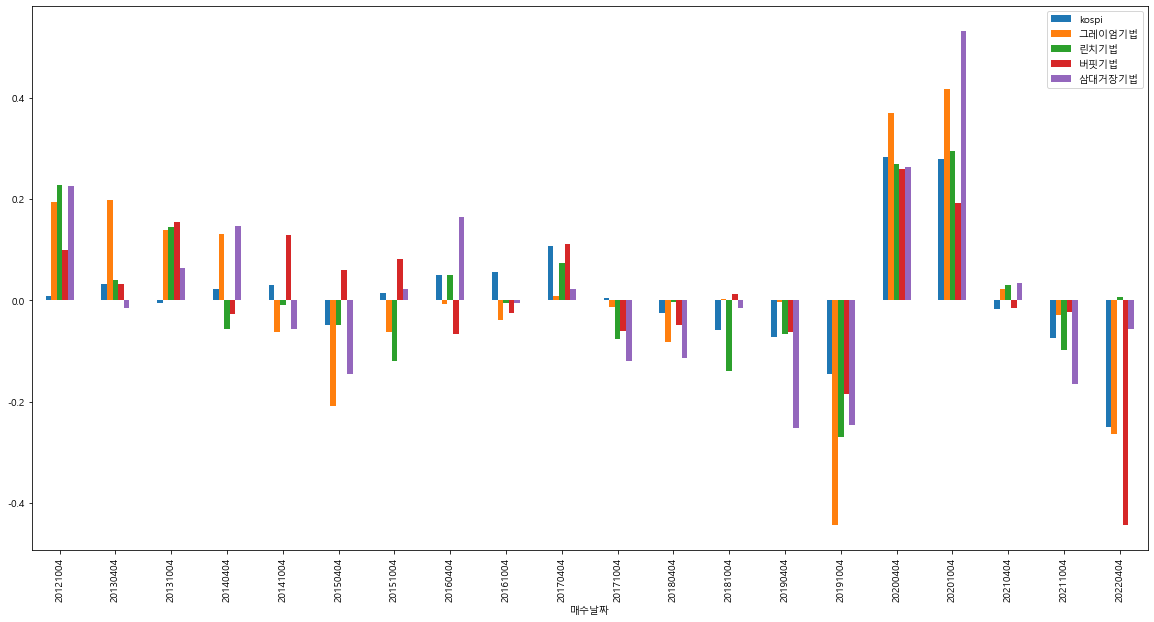

In [22]:
분기수익률.plot(x="매수날짜", y=['kospi','그레이엄기법','린치기법','버핏기법','삼대거장기법'], kind="bar",figsize=(20,10))


<AxesSubplot:xlabel='매수날짜'>

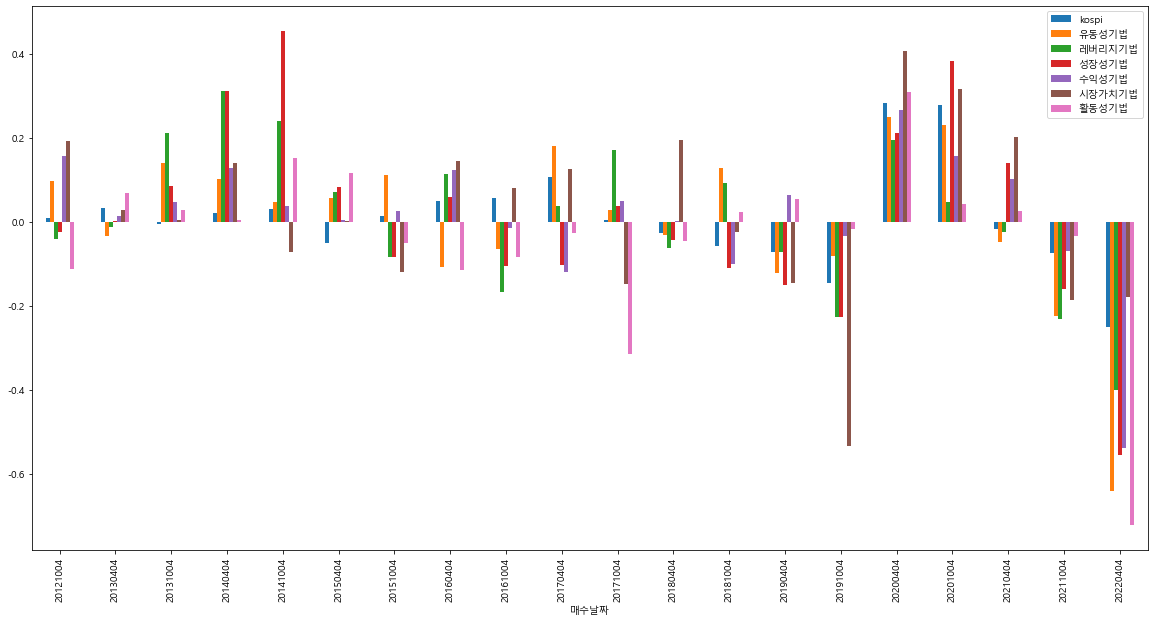

In [21]:
분기수익률.plot(x="매수날짜", y=['kospi','유동성기법','레버리지기법','성장성기법','수익성기법','시장가치기법','활동성기법'], kind="bar",figsize=(20,10))

## '포트폴리오 누적수익률'

<AxesSubplot:xlabel='매수날짜'>

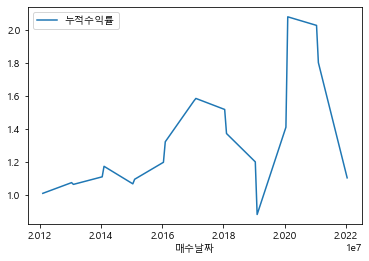

In [43]:
kospi.plot(x='매수날짜')

In [46]:
유동성분기선정함수

,시작날짜,매도날짜,포트폴리오종목명,수익률,누적수익률,재무비율방식
0,20121004,20130329,"['NAVER', '강원랜드', '에스원', '카카오', '우진']",0.098033,1.098033,유동성종목
1,20130404,20130929,"['유한양행', '동서', '빙그레', '카카오', '남양유업']",-0.034313,1.026043,유동성종목
2,20131004,20140329,"['동서', '신도리코', '모토닉', '일신방직', '삼영무역']",0.139352,1.308376,유동성종목
3,20140404,20140929,"['고려아연', '엔씨소프트', '영원무역', '동서', 'NHN']",0.103336,1.546915,유동성종목
4,20141004,20150329,"['엔씨소프트', '동서', '카카오', 'NHN', '신도리코']",0.047289,1.667356,유동성종목
5,20150404,20150929,"['카카오', '엔씨소프트', '동서', 'NHN', '부광약품']",0.056854,1.819006,유동성종목
6,20151004,20160329,"['고려아연', '엔씨소프트', '동서', 'NHN', '부광약품']",0.111024,2.131983,유동성종목
7,20160404,20160929,"['고려아연', '카카오', '엔씨소프트', '동서', '잇츠한불']",-0.107750,1.794511,유동성종목
8,20161004,20170329,"['삼성에스디에스', '고려아연', '엔씨소프트', '동서', '한국앤컴퍼니']",-0.063936,1.615842,유동성종목
9,20170404,20170929,"['삼성에스디에스', '고려아연', '엔씨소프트', '동서', '한국앤컴퍼니']",0.181529,2.090692,유동성종목


In [73]:

기법리스트 = [유동성분기선정함수,레버리지분기종목선정함수,그레이엄분기종목선정함수,린치분기종목선정함수,버핏분기종목선정함수,삼대투자분기종목선정함수
             ,성장성분기종목선정함수,수익성분기종목선정함수,시장가치분기종목선정함수,kospi]

In [75]:
기법2_list = ['유동성종목',
 '레버리지종목',
 '그레이엄종목',
 '린치종목',
 '버핏종목',
 '삼대투자종목',
 '성장성종목',
 '수익성종목',
 '시장가치종목',
 
'kospi']

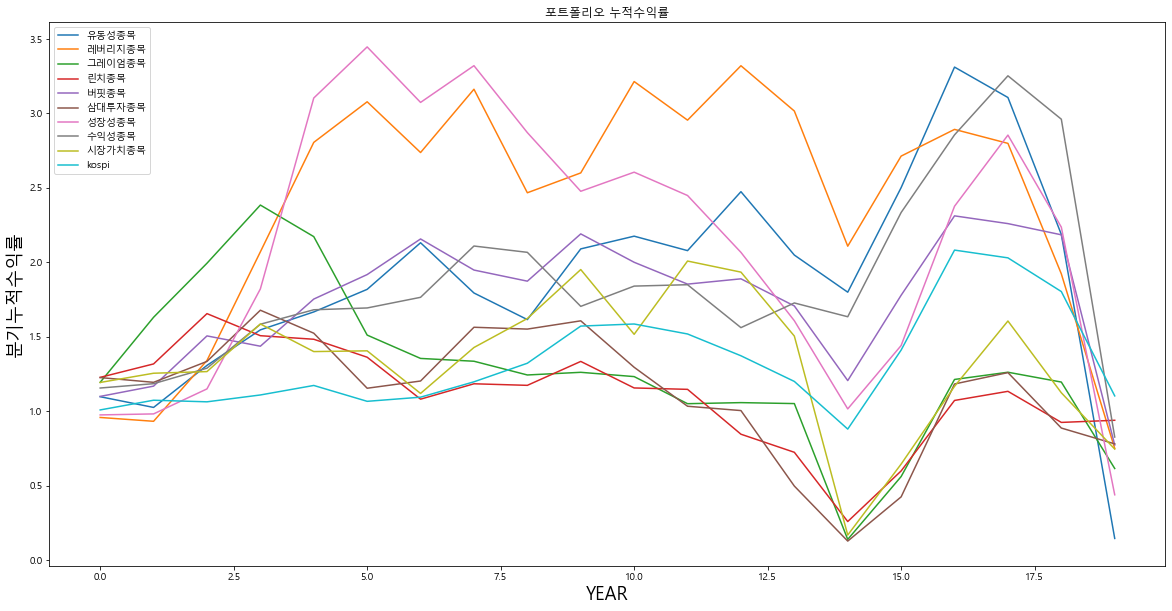

In [78]:
from matplotlib import pyplot as plt
제목 = '포트폴리오 누적수익률'
기법_list = 기법리스트
plt.figure(figsize=(20,10))

for 기법 in 기법_list:
    plt.plot(기법['누적수익률'],label=기법['재무비율방식'].unique().tolist())

plt.title(제목)
plt.xlabel('YEAR',fontsize=18)
plt.ylabel('분기누적수익률',fontsize=18)
plt.legend(기법2_list, loc='upper left')
plt.show()

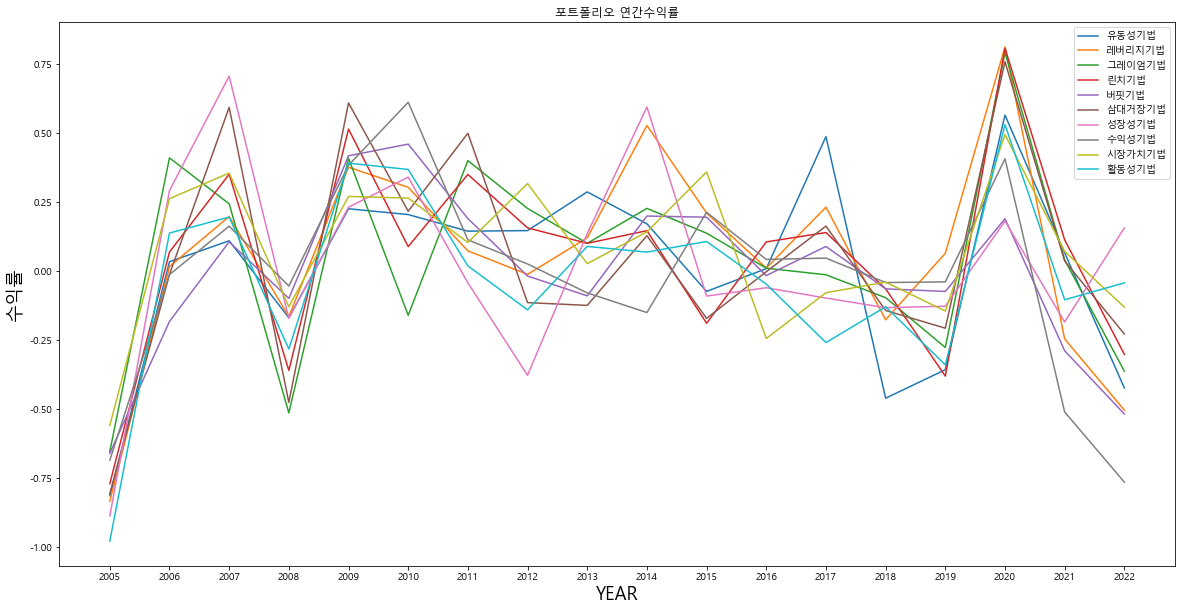

In [208]:
from matplotlib import pyplot as plt
제목 = '포트폴리오 연간수익률'
기법_list = 기법리스트
plt.figure(figsize=(20,10))

for 기법 in 기법_list:
    plt.plot(기법['수익률'],label=기법['재무비율방식'].unique().tolist())

plt.title(제목)
plt.xlabel('YEAR',fontsize=18)
plt.ylabel('수익률',fontsize=18)
plt.legend(총기법종목선정수익률['재무비율방식'].unique().tolist(), loc='upper right')
plt.show()

# 경기4국면

In [222]:
경기4국면 = pd.read_csv('./경기4국면.csv')

## 둔감

In [228]:
경기4국면[['거래일','둔감']][경기4국면['둔감']==1]

,거래일,둔감
0,2000-04-01,1
1,2000-05-01,1
2,2000-06-01,1
3,2000-07-01,1
4,2000-08-01,1
...,...,...
261,2022-01-01,1
262,2022-02-01,1
263,2022-03-01,1
264,2022-04-01,1


In [255]:
둔감_시작과끝 = [['2000-04-01',
 '2000-11-01'],
 
[ '2002-08-01',
 '2002-12-01'],
 
 ['2003-01-01',
 '2003-02-01'],
  
[ '2004-06-01',
 '2004-12-01'],
 
[ '2006-03-01',
 '2006-09-01'],
 
[ '2007-11-01',
 '2008-02-01'],
 
[ '2010-02-01',
 '2011-02-01'],
 
 ['2011-04-01',
 '2011-07-01'],
 
 ['2015-06-01',
 '2015-09-01'],
 
 ['2016-02-01',
 '2016-04-01'],
 
 ['2017-07-01',
 '2018-06-01'],
 
 ['2021-09-01',
 '2022-05-01']]



In [271]:
둔감 = pd.DataFrame(둔감_시작과끝,columns=['시작','끝'])
둔감['국면'] = '둔감'
둔감

,시작,끝,국면
0,2000-04-01,2000-11-01,둔감
1,2002-08-01,2002-12-01,둔감
2,2003-01-01,2003-02-01,둔감
3,2004-06-01,2004-12-01,둔감
4,2006-03-01,2006-09-01,둔감
5,2007-11-01,2008-02-01,둔감
6,2010-02-01,2011-02-01,둔감
7,2011-04-01,2011-07-01,둔감
8,2015-06-01,2015-09-01,둔감
9,2016-02-01,2016-04-01,둔감


## 위축

In [239]:
위축_list = 경기4국면['거래일'][경기4국면['위축']==1].tolist()

In [260]:
위축_시작과끝 = [['2000-12-01',
 '2001-06-01'],
 
[ '2003-03-01',
 '2003-07-01'],
 
 ['2005-01-01',
 '2005-02-01'],
 
 ['2008-03-01',
 '2008-12-01'],
 
 ['2011-08-01',
 '2012-02-01'],

 ['2013-10-01',
 '2014-08-01'],
 
 ['2018-07-01',
 '2019-11-01'],
 
 ['2020-04-01',
 '2020-06-01']]

In [270]:
위축 = pd.DataFrame(위축_시작과끝,columns=['시작','끝'])
위축['국면'] = '위축'
위축

,시작,끝,국면
0,2000-12-01,2001-06-01,위축
1,2003-03-01,2003-07-01,위축
2,2005-01-01,2005-02-01,위축
3,2008-03-01,2008-12-01,위축
4,2011-08-01,2012-02-01,위축
5,2013-10-01,2014-08-01,위축
6,2018-07-01,2019-11-01,위축
7,2020-04-01,2020-06-01,위축


## 확장

In [245]:
확장_list = 경기4국면['거래일'][경기4국면['확장']==1].tolist()

In [263]:
확장_시작과끝 = [['2002-02-01',
 '2002-07-01'],
 
[ '2004-02-01',
 '2004-05-01'],
 
 ['2005-05-01',
 '2006-02-01'],
 
 ['2006-10-01',
 '2007-10-01'],
 
 ['2009-06-01',
 '2010-01-01'],
 
 ['2011-03-01','2011-03-31'],
 
 ['2015-01-01',
 '2015-05-01'],
 
 ['2015-10-01',
 '2016-01-01'],
 
 ['2016-05-01',
 '2017-06-01'],
 
 ['2021-01-01',
 '2021-08-01']]



In [274]:
확장 = pd.DataFrame(확장_시작과끝,columns=['시작','끝'])
확장['국면'] = '확장'
확장

,시작,끝,국면
0,2002-02-01,2002-07-01,확장
1,2004-02-01,2004-05-01,확장
2,2005-05-01,2006-02-01,확장
3,2006-10-01,2007-10-01,확장
4,2009-06-01,2010-01-01,확장
5,2011-03-01,2011-03-31,확장
6,2015-01-01,2015-05-01,확장
7,2015-10-01,2016-01-01,확장
8,2016-05-01,2017-06-01,확장
9,2021-01-01,2021-08-01,확장


## 회복

In [252]:
회복_list = 경기4국면['거래일'][경기4국면['회복']==1].tolist()

In [265]:
회복_시작과끝 = [['2001-07-01',
 '2002-01-01'],
 
[ '2003-08-01',
 '2004-01-01'],
 
 ['2005-03-01',
 '2005-04-01'],
 
 ['2009-01-01',
 '2009-05-01'],
 
 ['2012-03-01',
 '2013-09-01'],
 
 ['2014-09-01',
 '2014-12-01'],
 
 ['2019-12-01',
 '2020-03-01'],
 
 ['2020-07-01',
 '2020-12-01']]

In [275]:
회복 = pd.DataFrame(회복_시작과끝,columns=['시작','끝'])
회복['국면'] = '회복'
회복

,시작,끝,국면
0,2001-07-01,2002-01-01,회복
1,2003-08-01,2004-01-01,회복
2,2005-03-01,2005-04-01,회복
3,2009-01-01,2009-05-01,회복
4,2012-03-01,2013-09-01,회복
5,2014-09-01,2014-12-01,회복
6,2019-12-01,2020-03-01,회복
7,2020-07-01,2020-12-01,회복


In [290]:
국면 = pd.DataFrame()
국면 = pd.concat([국면,회복],axis=0)
국면=pd.concat([국면,둔감],axis=0)
국면=pd.concat([국면,위축],axis=0)
국면=pd.concat([국면,확장],axis=0)
국면 = 국면.sort_values('시작',ascending=True)

In [295]:
# 국면.to_csv('국면.csv',index=False)

# 국면 시작과 끝

In [297]:
국면 = pd.read_csv('./국면.csv')

In [301]:
국면

,시작,끝,국면
0,2000-04-01,2000-11-01,둔감
1,2000-12-01,2001-06-01,위축
2,2001-07-01,2002-01-01,회복
3,2002-02-01,2002-07-01,확장
4,2002-08-01,2002-12-01,둔감
5,2003-01-01,2003-02-01,둔감
6,2003-03-01,2003-07-01,위축
7,2003-08-01,2004-01-01,회복
8,2004-02-01,2004-05-01,확장
9,2004-06-01,2004-12-01,둔감
